# 데이터 모델링

## 의사결정트리

In [1]:
# 필요 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/교량_통합데이터.csv'
df = pd.read_csv(csvFile)
df.head()

,교량명,시설물종별등급구분,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장
0,진위교,2,125.0,21.0,4,PSCI거더교,B,DB-24,37,5.0,25.0
1,풍계교,3,55.0,20.0,2,RC슬래브교,B,DB-24,27,4.0,15.0
2,태평교,3,43.8,19.5,4,PSCI거더교,B,DB-24,32,2.0,21.9
3,장평교,2,105.0,19.5,4,RC슬래브교,B,DB-24,30,7.0,15.0
4,덕평교,3,32.0,10.0,2,RC슬래브교,B,DB-24,27,2.0,16.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   교량명        5635 non-null   object 
 1   시설물종별등급구분  5635 non-null   object 
 2   교량연장       5635 non-null   float64
 3   교량폭        5635 non-null   float64
 4   차로수        5635 non-null   int64  
 5   상부구조형식     5635 non-null   object 
 6   최종안전점검결과   5635 non-null   object 
 7   설계활하중      5635 non-null   object 
 8   준공후경과년수    5635 non-null   int64  
 9   경간수        5635 non-null   float64
 10  최대경간장      5635 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 484.4+ KB


## 데이터 인코딩

* 범주형 변수(시설물종별등급구분, 최종안전점검결과, 상부구조형식, 설계하중): 데이터 인코딩 필요-> 레이블인코딩, 원핫인코딩
* 여기서는 일단 레이블 인코딩 먼저 사용해봄

In [4]:
def encode_features(df):
    features = ['시설물종별등급구분', '최종안전점검결과', '상부구조형식', '설계활하중']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [5]:
bridge_df = encode_features(df)
bridge_df.head()

,교량명,시설물종별등급구분,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장
0,진위교,1,125.0,21.0,4,0,1,2,37,5.0,25.0
1,풍계교,2,55.0,20.0,2,6,1,2,27,4.0,15.0
2,태평교,2,43.8,19.5,4,0,1,2,32,2.0,21.9
3,장평교,1,105.0,19.5,4,6,1,2,30,7.0,15.0
4,덕평교,2,32.0,10.0,2,6,1,2,27,2.0,16.0


In [6]:
# 각 범주변수의 인코딩 확인
# 0: 1종, 1: 2종, 2: 3종, 3: 기타
bridge_df['시설물종별등급구분'].unique()

array([1, 2, 0, 3])

In [7]:
# 0: A, 1: B, 2: C, 3: D, 4: E
bridge_df['최종안전점검결과'].unique()

array([1, 2, 0, 3, 4])

In [8]:
# 0: PSCI거더교 부터 16: 프리플랙스거더교 까지
bridge_df['상부구조형식'].unique()

array([ 0,  6, 17,  9, 12,  7, 10, 14,  1, 15, 11,  2,  4,  3,  8, 13,  5,
       16])

In [9]:
# 0: DB-13.5, 1: DB-18, 2: DB-24, 3: DB-9, 4: 기타, 5: 미상
bridge_df['설계활하중'].unique()

array([2, 1, 0, 4, 3])

### 데이터타입 정렬

In [10]:
bridge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   교량명        5635 non-null   object 
 1   시설물종별등급구분  5635 non-null   int32  
 2   교량연장       5635 non-null   float64
 3   교량폭        5635 non-null   float64
 4   차로수        5635 non-null   int64  
 5   상부구조형식     5635 non-null   int32  
 6   최종안전점검결과   5635 non-null   int32  
 7   설계활하중      5635 non-null   int32  
 8   준공후경과년수    5635 non-null   int64  
 9   경간수        5635 non-null   float64
 10  최대경간장      5635 non-null   float64
dtypes: float64(4), int32(4), int64(2), object(1)
memory usage: 396.3+ KB


### 모델링 과정에서 datetime64와 float64데이터를 같이 못쓴다는 오류 발생
* 1. datetime타입인 최종안전점검 일자를 제외하고 모델링 수행
* 2. 나머지 데이터타입을 정수형으로 변환(소수점의 오차가 발생)

## 불필요컬럼 삭제

In [11]:
# 필요없는 변수 제외(교량명, 시군구, 위도, 경도 등)
bridge_df = bridge_df.drop(['교량명'], axis = 1)
bridge_df.head()

,시설물종별등급구분,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장
0,1,125.0,21.0,4,0,1,2,37,5.0,25.0
1,2,55.0,20.0,2,6,1,2,27,4.0,15.0
2,2,43.8,19.5,4,0,1,2,32,2.0,21.9
3,1,105.0,19.5,4,6,1,2,30,7.0,15.0
4,2,32.0,10.0,2,6,1,2,27,2.0,16.0


## 데이터 모델링

* 안전등급 컬럼을 y변수로 세팅, 나머지는 x변수
* 1차적으로 의사결정트리모델 사용

In [12]:
y_bridge_df = bridge_df['최종안전점검결과']
X_bridge_df = bridge_df.drop(['최종안전점검결과'], axis = 1)

In [13]:
X_bridge_df.shape

(5635, 9)

In [14]:
y_bridge_df.shape

(5635,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_bridge_df, y_bridge_df, test_size = 0.3, random_state = 12)

In [16]:
# 의사결정트리
dt_clf = DecisionTreeClassifier(random_state = 12)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('의사결정트리 정확도: {0:.3f}'.format(accuracy_score(y_test, dt_pred)))

의사결정트리 정확도: 0.804


## 트리 시각화

In [17]:
from sklearn.tree import export_graphviz
import graphviz
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=X_train.columns,
                           filled=True, rounded=True, impurity=  True, special_characters=True, fontname='NanumGothic')

# 그래프 생성
graph = graphviz.Source(dot_data)

# 그래프 출력
graph.render("decision_tree")

'decision_tree.pdf'

In [18]:
graph.format = 'png'
graph.render("decision_tree")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.63051 to fit


'decision_tree.png'

## 교차검증

In [19]:
# cross_val_score()
scores = cross_val_score(dt_clf, X_bridge_df, y_bridge_df, cv = 8)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7163
교차 검증 1 정확도: 0.6184
교차 검증 2 정확도: 0.6681
교차 검증 3 정확도: 0.6591
교차 검증 4 정확도: 0.6634
교차 검증 5 정확도: 0.7287
교차 검증 6 정확도: 0.7472
교차 검증 7 정확도: 0.7088
평균 정확도: 0.6887


In [20]:
# grid_search
parameters = {'max_depth':[i for i in range(10)], 'min_samples_split':[i for i in range(10)],
              'min_samples_leaf':[i for i in range(10)], 'max_features': [i for i in range(10)]}

grid_cv = GridSearchCV(dt_clf , param_grid = parameters , scoring = 'accuracy' , cv = 5)
grid_cv.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_cv.best_score_))
best_dclf = grid_cv.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8304
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8451


* Gridsearch를 통해 최적의 하이퍼파라미터와 정확도를 확인했다.
* 확인된 파라미터를 모델에 적용하여 그래프를 다시 도출해봄

In [21]:
# 의사결정트리
dt_clf = DecisionTreeClassifier(random_state = 12, max_depth = 7, max_features = 6,
                                min_samples_leaf = 6, min_samples_split = 2)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('의사결정트리 정확도: {0:.3f}'.format(accuracy_score(y_test, dt_pred)))

의사결정트리 정확도: 0.845


In [22]:
from sklearn.tree import export_graphviz
import graphviz
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
dot_data = export_graphviz(dt_clf, out_file=None, feature_names = X_train.columns,
                           filled = True, rounded = True, impurity = True,
                           special_characters = True, fontname = 'NanumGothic')

# 그래프 생성
graph = graphviz.Source(dot_data)

# 그래프 출력
graph.format = 'png'
graph.render("decision_tree1")

'decision_tree1.png'

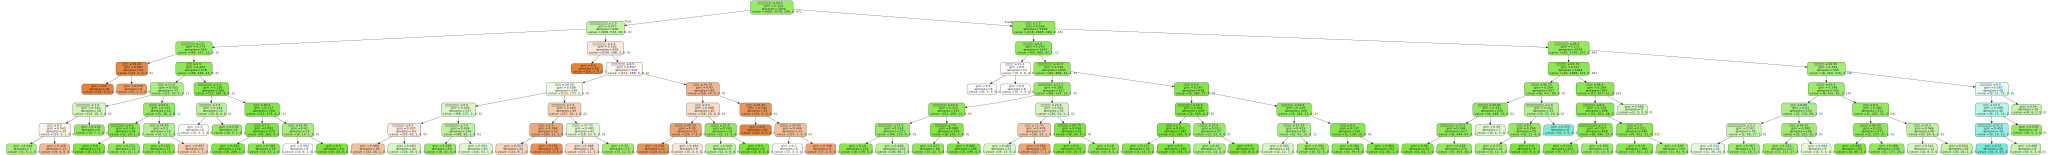

In [23]:
graph

* 빨간색이 A, 초록색이 B, 민트색이 C로 분류되는 것으로 예상

In [24]:
# 별도로 pdf출력
graph.format = 'pdf'
graph.render("decision_tree1")

'decision_tree1.pdf'

## 중요도가 높은 요인 시각화

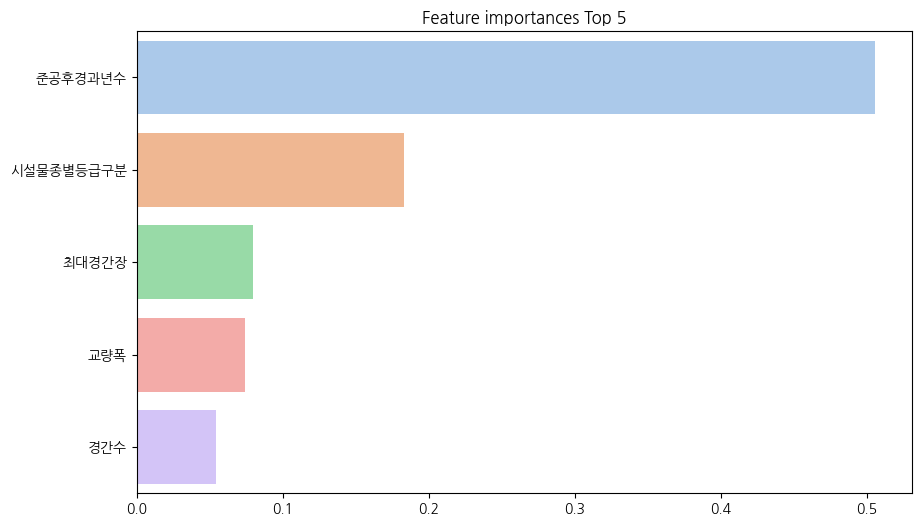

In [25]:
# 중요도가 높은 요인 시각화
ftr_importances_values = best_dclf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top5 = ftr_importances.sort_values(ascending = False)[:5]
plt.figure(figsize = (10,6))
plt.title('Feature importances Top 5')
sns.barplot(x = ftr_top5 , y = ftr_top5.index, palette = 'pastel')
plt.show()

## StandardScaler 진행 후 모델링

In [26]:
y_brid_df = bridge_df['최종안전점검결과']
X_brid_df = bridge_df.drop(['최종안전점검결과'], axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_brid_df)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_brid_df, test_size = 0.3, random_state = 12)

In [28]:
# 의사결정트리
dt_clf = DecisionTreeClassifier(random_state = 12)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('의사결정트리 정확도: {0:.3f}'.format(accuracy_score(y_test, dt_pred)))

의사결정트리 정확도: 0.803


In [29]:
scores = cross_val_score(dt_clf, X_brid_df, y_brid_df, cv = 8)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7163
교차 검증 1 정확도: 0.6184
교차 검증 2 정확도: 0.6681
교차 검증 3 정확도: 0.6591
교차 검증 4 정확도: 0.6634
교차 검증 5 정확도: 0.7287
교차 검증 6 정확도: 0.7472
교차 검증 7 정확도: 0.7088
평균 정확도: 0.6887
